In [2]:
# Start with questions about the homework and about images as data
# Today we will be modeling a popular dataset about handwritten digits

In [3]:
# load in the dataset and import our dependencies
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
digits = datasets.load_digits()


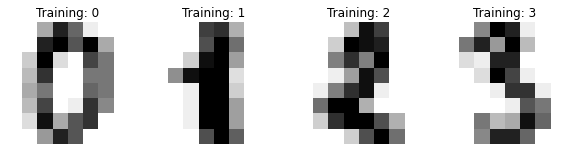

In [4]:
# Let's Visualize the dataset. Please read through and try to understand this code.
# Try removing parts and seeing what changes.
# This is a common exercise for a developer, grabbing working code and learning from it.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.target.shape

(1797,)

In [7]:
n_digits= digits.images.shape[0]

In [8]:
n_digits

1797

In [9]:
x = digits.images.reshape(n_digits,-1)

In [10]:
# If you try to pass digits.images into a model, it wont work because it is 3 dimensional.
# Flatten the images such that they have rows (images) and columns (features)

In [11]:
y = digits.target

In [12]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# Create a smaller dataset that is 10% of the original dataset, grabbing every 10th image.
xtrn, ytrn = (x[::10], y[::10])

In [15]:
xtrn.shape

(180, 64)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
# Train a model on xtrn, ytrn and check the accuracy of the model.
classifier = Ridge().fit(xtrn, ytrn)
acc = (classifier.predict(xtrn).round() == ytrn).mean()
print('percent accuracy is ', acc.round(3))

percent accuracy is  0.311


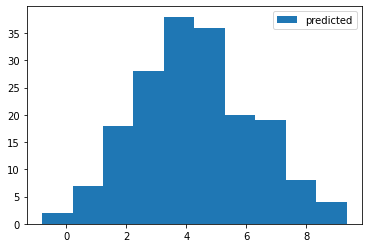

In [24]:
# Oh no! Our accuracy is pretty low.
# Lets visualize a histogram of our predictions to see how things are going

plt.hist(classifier.predict(xtrn), label = 'predicted')
plt.legend()

In [25]:
# That looks funny... we should be getting evenly distributed predictions for all the numbers.
# Why do we see that mound shape?

In [20]:
# Maybe let's look for a model that doesn't impose order, like logistic regression
# Logistic regression treats each number output as a completely independent possibility
# It doesnt assume 2 and 3 are similar, for instance

In [21]:
from sklearn.linear_model import LogisticRegression


In [27]:
lrclassifier = LogisticRegression().fit(xtrn, ytrn)
acc = (lrclassifier.predict(xtrn).round() == ytrn).mean()
print('percent accuracy is ', acc.round(3))

percent accuracy is  1.0


C:\Users\wslee\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# okay that's a little more reasonable. Now what about the accuracy?
# Your code here

In [ ]:
# great! Our accuracy is 100%!

In [ ]:
# Just to make sure, let's check our accuracy at predicting on the rest of the dataset.

# Your code here

In [ ]:
# Oh, shoot. it dropped slightly. Let's be a little more rigorous about this.
# When we split up the training data, let's take the data we didn't use, and form the rest into
# a "Validation" dataset, that we can use to test how well our model works.
# Lets do a 10% training, 90% validation split, because otherwise this problem is too easy

In [32]:
n_data = x.shape[0]
train_locations = list(range(0, n_data, 10))
val_locations = [d for d in range(n_data) if d not in train_locations]

xtrn, ytrn = x[train_locations], y[train_locations]
xval, yval = x[val_locations], y[val_locations]

In [37]:
xval, yval

(array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        [ 0.,  0.,  7., ...,  9.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([1, 2, 3, ..., 8, 9, 8]))

In [36]:
xtrn, ytrn

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  3.,  0.,  0.],
        [ 0.,  0.,  3., ...,  4.,  0.,  0.],
        ...,
        [ 0.,  2., 10., ...,  9.,  0.,  0.],
        [ 0.,  3., 14., ..., 11.,  1.,  0.],
        [ 0.,  0.,  5., ...,  3.,  0.,  0.]]),
 array([0, 0, 0, 0, 8, 2, 3, 1, 1, 1, 4, 4, 5, 0, 0, 0, 0, 8, 2, 3, 1, 1,
        9, 5, 7, 4, 4, 4, 4, 6, 7, 2, 4, 5, 2, 7, 6, 8, 4, 4, 4, 4, 6, 7,
        2, 4, 5, 2, 7, 6, 8, 4, 4, 4, 4, 6, 7, 2, 4, 5, 2, 7, 6, 8, 4, 4,
        4, 4, 6, 7, 2, 4, 5, 2, 7, 6, 8, 4, 4, 4, 4, 6, 7, 2, 4, 5, 2, 7,
        6, 8, 4, 5, 5, 5, 5, 3, 6, 4, 0, 3, 1, 5, 9, 1, 1, 1, 9, 4, 8, 3,
        9, 3, 1, 3, 2, 8, 3, 3, 3, 5, 7, 8, 3, 9, 3, 1, 3, 2, 8, 3, 3, 3,
        5, 7, 8, 3, 9, 3, 1, 3, 2, 8, 5, 5, 5, 5, 3, 0, 6, 2, 1, 6, 9, 2,
        9, 5, 5, 7, 9, 1, 2, 6, 0, 3, 1, 5, 4, 3, 3, 3, 5, 7, 8, 3, 9, 3,
        1, 3, 2, 8]))

In [34]:
val_locations

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 

In [30]:
x.shape[0]

1797

In [29]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Now please train a model on the training set, make predictions on the validation set.
# And test the performance of the model
# Your code here

In [ ]:
# Print the accuracy at teh validation set here
# Your code here

In [ ]:
# What can we do to improve the model?
# Use larger training datasets
# Try another model